# Unsupervised Learning Final Project

This is the final project for the **Data Science in Python: Unsupervised Learning** course. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters
7. Make Recommendations

## 0. Goal & Scope

**GOAL**: You are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Your task is to use a clustering technique to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

The data can be found in the `employee_data.csv` file.

In [2]:
# read in the employee data
import pandas as pd 
data = pd.read_csv('../Data/employee_data.csv')

data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [3]:
# note the number of rows and columns
data.shape

(1470, 10)

In [5]:
# view the data types of all the columns
data.dtypes

EmployeeID            int64
Age                   int64
Gender               object
DistanceFromHome      int64
JobLevel              int64
Department           object
MonthlyIncome         int64
PerformanceRating     int64
JobSatisfaction       int64
Attrition            object
dtype: object

In [ ]:
# look at the numeric columns
data.select_dtypes(include='number')

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,1001,41,1,2,5993,3,4
1,1002,49,8,2,5130,4,2
2,1004,37,2,1,2090,3,3
3,1005,33,3,1,2909,3,3
4,1007,27,2,1,3468,3,2
...,...,...,...,...,...,...,...
1465,3061,36,23,2,2571,3,4
1466,3062,39,6,3,9991,3,1
1467,3064,27,4,2,6142,4,2
1468,3065,49,2,2,5390,3,2


In [9]:
# look at the non-numeric columns
data.select_dtypes(include='object')

,Gender,Department,Attrition
0,Female,Sales,Yes
1,Male,Research & Development,No
2,Male,Research & Development,Yes
3,Female,Research & Development,No
4,Male,Research & Development,No
...,...,...,...
1465,Male,Research & Development,No
1466,Male,Research & Development,No
1467,Male,Research & Development,No
1468,Male,Sales,No


### b. Data Prep: Convert the data types

Use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [12]:
import numpy as np

In [19]:
# create a copy of the dataframe
df_numeric = data.copy()

In [21]:
# look at the gender values
df_numeric.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [22]:
# change gender into a numeric field using np.where
df_numeric['Gender'] = np.where(df_numeric['Gender']=='Female',1,0)
df_numeric['Gender']

0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1470, dtype: int64

In [23]:
# look at the attrition values
df_numeric['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [24]:
# change attrition to a numeric field using np.where
df_numeric['Attrition'] = np.where(df_numeric['Attrition']=='Yes',1,0)
df_numeric['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [25]:
# look at the department values
df_numeric['Department'].value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [ ]:
# change department to a numeric field via dummy variables
df_dummies=pd.get_dummies(df_numeric['Department']).astype(int)
df_dummies

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


In [ ]:
# attach the columns back on to the dataframe
df_numeric = pd.concat([df_numeric, df_dummies], axis=1)

In [32]:
df_numeric = df_numeric.drop(columns=['Department'])


In [34]:
# view the cleaned dataframe
df_numeric.dtypes

EmployeeID                int64
Age                       int64
Gender                    int64
DistanceFromHome          int64
JobLevel                  int64
MonthlyIncome             int64
PerformanceRating         int64
JobSatisfaction           int64
Attrition                 int64
Human Resources           int64
Research & Development    int64
Sales                     int64
dtype: object

In [35]:
# note the number of rows and columns
df_numeric.shape

(1470, 12)

### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [46]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?
len(df_numeric[df_numeric['Attrition']==1]['Attrition'])/len(df_numeric['Attrition'])

0.16122448979591836

In [ ]:
# best practice

df_numeric['Attrition'].mean()

np.float64(0.16122448979591836)

In [49]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
df_numeric.describe()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2024.865306,36.923810,0.400000,9.192517,2.063946,6502.931293,3.153741,2.728571,0.161224,0.042857,0.653741,0.303401
std,602.024335,9.135373,0.490065,8.106864,1.106940,4707.956783,0.360824,1.102846,0.367863,0.202604,0.475939,0.459884
min,1001.000000,18.000000,0.000000,1.000000,1.000000,1009.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1491.250000,30.000000,0.000000,2.000000,1.000000,2911.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.500000,36.000000,0.000000,7.000000,2.000000,4919.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,2555.750000,43.000000,1.000000,14.000000,3.000000,8379.000000,3.000000,4.000000,0.000000,0.000000,1.000000,1.000000
max,3068.000000,60.000000,1.000000,29.000000,5.000000,19999.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#  correct solution

df_numeric.groupby('Attrition').mean()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


### d. Data Prep: Remove the Attrition and ID Columns

Exclude the attrition column (to be overlayed onto our clusters later on) and the ID column.

In [50]:
# create a new dataframe without the attrition column for us to model on
df_model = df_numeric.drop(columns=['Attrition'])
df_model

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,0,0,1
1,1002,49,0,8,2,5130,4,2,0,1,0
2,1004,37,0,2,1,2090,3,3,0,1,0
3,1005,33,1,3,1,2909,3,3,0,1,0
4,1007,27,0,2,1,3468,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,3061,36,0,23,2,2571,3,4,0,1,0
1466,3062,39,0,6,3,9991,3,1,0,1,0
1467,3064,27,0,4,2,6142,4,2,0,1,0
1468,3065,49,0,2,2,5390,3,2,0,0,1


In [51]:
# drop the employee column as well before modeling
df_model = df_model.drop(columns=['EmployeeID'])
df_model

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,2571,3,4,0,1,0
1466,39,0,6,3,9991,3,1,0,1,0
1467,27,0,4,2,6142,4,2,0,1,0
1468,49,0,2,2,5390,3,2,0,0,1


In [52]:
# note the number of rows and columns in the dataframe
df_model.shape

(1470, 10)

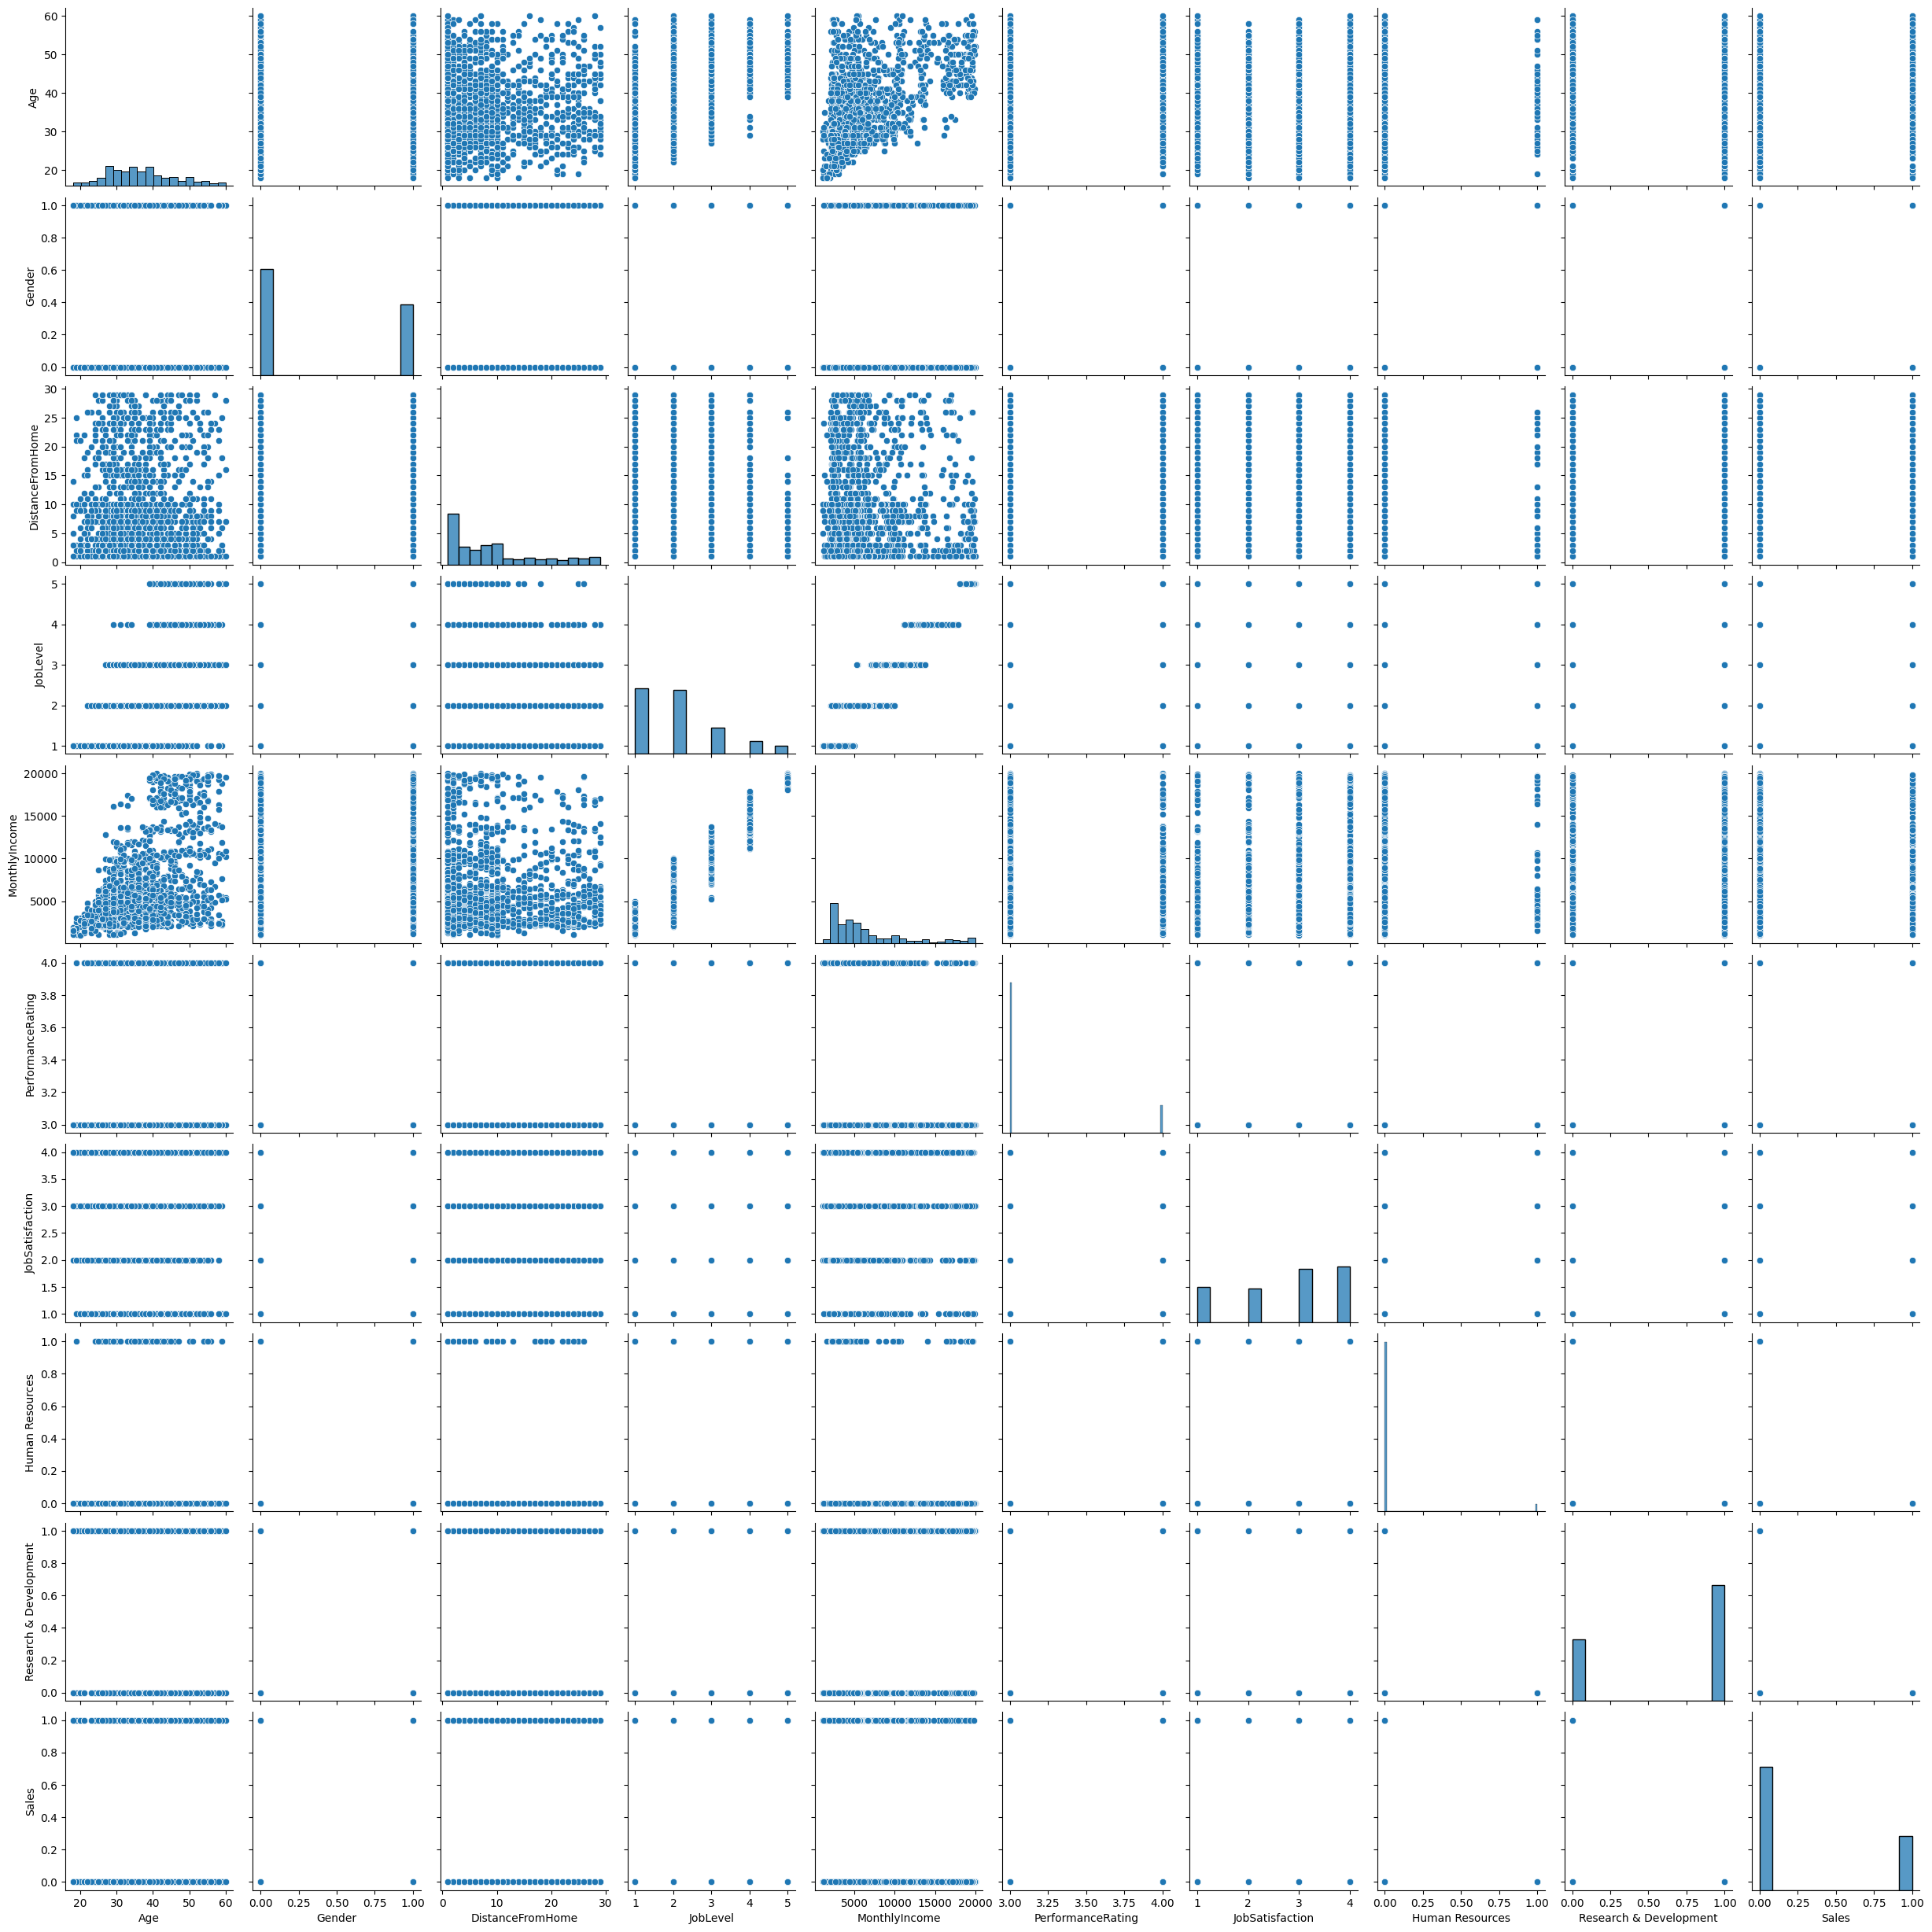

In [53]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
import seaborn as sns

sns.pairplot(df_model)

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [ ]:
# scale the data using standardization


In [ ]:
# double check that all the column means are 0 and standard deviations are 1


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [ ]:
# import kmeans and write a loop to fit models with 2 to 15 clusters


In [ ]:
# plot the inertia values


In [ ]:
# plot the silhouette scores


### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [ ]:
# fit a PCA model with 2 components


In [ ]:
# view the explained variance ratio


In [ ]:
# view the components


In [ ]:
# view the columns


In [ ]:
# interpret the components


### b. Overlay the K-Means cluster colors

In [ ]:
# transform the data


In [ ]:
# plot the data


In [ ]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)


### c. Overlay the Department colors instead

In [ ]:
# overlay the department colors (hint: set the hue to be the department column)


## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [ ]:
# create a new dataframe that excludes the three department columns from the scaled dataframe


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [ ]:
# write a loop to fit models with 2 to 15 clusters


In [ ]:
# plot the inertia values


In [ ]:
# plot the silhouette scores


### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k = [some value]

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


#### ii. k = [another value]

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


#### iii. k = [another value]

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [ ]:
# fit a PCA model with 2 components


In [ ]:
# view the explained variance ratio


In [ ]:
# view the components


In [ ]:
# view the columns


In [ ]:
# interpret the components


### b. Overlay the K-Means cluster colors

In [ ]:
# transform the data


In [ ]:
# plot the data


In [ ]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)


### c. OPTIONAL: Create a 3D plot

In [ ]:
# fit a PCA model with 3 components


In [ ]:
# view the explained variance ratio


In [ ]:
# view the components


In [ ]:
# view the columns


In [ ]:
# interpret the components


In [ ]:
# transform the data


In [ ]:
# create a 3d scatter plot


## 6. EDA on Clusters

Let's decide to go with the 6 clusters without department data.

### a. Confirm the 6 clusters

In [ ]:
# fit a kmeans model with 6 clusters


In [ ]:
# view the cluster labels


### b. Create a dataframe with the cluster labels and names

In [ ]:
# create a dataframe with two columns - one of the label and another of the cluster name

# create a mapping for the cluster names

# combine the labels and names into a single dataframe


### c. View the attrition rates for each cluster

In [ ]:
# combine the clusters and attrition data


In [ ]:
# what is the attrition rate for each cluster?


In [ ]:
# sort the values


In [ ]:
# interpret the findings


In [ ]:
# find the number of employees in each cluster


### d. View the department breakdown for each cluster

In [ ]:
# combine the clusters and department data


In [ ]:
# what is the attrition rate for each cluster + department combination?


In [ ]:
# sort the values


In [ ]:
# interpret the findings


In [ ]:
# find the number of employees in each cluster + department combo


## 7. Make Recommendations

In [ ]:
# looking at the clusters, what segment info would you share with the team?


In [ ]:
# what recommendations would you suggest to retain employees in each cluster?
